In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

cols_dwell = ['building_type', 'ownership', 'condition', 'rooms', 'region_type_dwell']
cols_hh = ['hh_type', 'hh_size', 'age', 'income_quintile', 'region_type_hh']

plt.style.use('bmh')

# year_start_stop = [2004, 2019]

In [2]:
data_base_folder = '/home/pool/Nextcloud/EnSu/Qualifikationsarbeiten/Modellierung/Inhabit/outputs_for_figures'


In [3]:
def load_inhabit_matrix_from_csv(file, cols_dwell, cols_hh, empirical = False):
    length = len(cols_dwell + cols_hh)
    length += 2 if empirical else 0
    
    inhabit = pd.read_csv(
                os.path.join(file),
                index_col=[i for i in range(length)],
            )
    return inhabit

In [4]:
large_movers_file = os.path.join(data_base_folder,'figure_test',  'movers_2002_2019.csv')
large_movers_df = load_inhabit_matrix_from_csv(large_movers_file, cols_dwell, cols_hh)

In [5]:
# define start/stop years as tuples
years_empirical = 2002, 2010
years_model = 2011, 2019

# create year vector
years = np.arange(years_empirical[0], years_model[1]+1)

In [6]:
total_empirical_movers = pd.read_csv(os.path.join('data/total_empirical_movers.csv'))['empirical']

In [28]:
total_empirical_movers

0     2502168.0
1     2596491.0
2     2577381.0
3     2381892.0
4     2855069.0
5     2273308.0
6     2391397.0
7     2243914.0
8     2397273.0
9     1992752.0
10    2378805.0
11    2399197.0
12    2298848.0
13    2154705.0
14    2020562.0
15    1919379.0
16    1796974.0
17    1936827.0
Name: empirical, dtype: float64

In [30]:
large_movers_df

weights_2002  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  not renovated 1     rural             with_children    1       <40  q1              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q2              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q3              rural                    0.0   
...                                                                                                                                       ...   
SFH           private tenant renovated     4+    urban             without_children 5+      >=40 q3              urban                    0.0   
                                                                                                 q4              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q5              rural                    0.0   
                                                                                                                 urban                    0.0   

                                                                                                                                 weights_2003  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  not renovated 1     rural             with_children    1       <40  q1              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q2              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q3              rural                    0.0   
...                                                                                                                                       ...   
SFH           private tenant renovated     4+    urban             without_children 5+      >=40 q3              urban                    0.0   
                                                                                                 q4              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q5              rural                    0.0   
                                                                                                                 urban                    0.0   

                                                                                                                                 weights_2004  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  not renovated 1     rural             

In [34]:
df_summed_movers = pd.DataFrame(index=years)
# for loop empirical
for year in range(years_empirical[0], years_empirical[1]+1):
    df_summed_movers.loc[year, 'empirical'] = large_movers_df[f'weights_{year}'].sum()

# for loop modeled
for year in range(years_model[0], years_model[1]+1):
    df_summed_movers.loc[year, 'modeled'] = large_movers_df[f'weights_{year}_reg'].sum()
    df_summed_movers.loc[year, 'empirical'] = large_movers_df[f'weights_{year}'].sum()
    

#df_summed_movers['empirical'] = pd.read_csv(os.path.join('data/total_empirical_movers.csv'),index_col=0)['empirical']

In [35]:
df_summed_movers

empirical       modeled
2002  2502168.0           NaN
2003  2596491.0           NaN
2004  2577381.0           NaN
2005  2381892.0           NaN
2006  2855069.0           NaN
2007  2273308.0           NaN
2008  2391397.0           NaN
2009  2243914.0           NaN
2010  2397273.0           NaN
2011  1992752.0  2.528441e+06
2012  2378805.0  2.528358e+06
2013  2399197.0  2.528252e+06
2014  2298848.0  2.528126e+06
2015  2154705.0  2.527983e+06
2016  2020562.0  2.527826e+06
2017  1919379.0  2.527662e+06
2018  1796974.0  2.527494e+06
2019  1936827.0  2.527330e+06

<Axes: title={'center': 'summed movers'}>

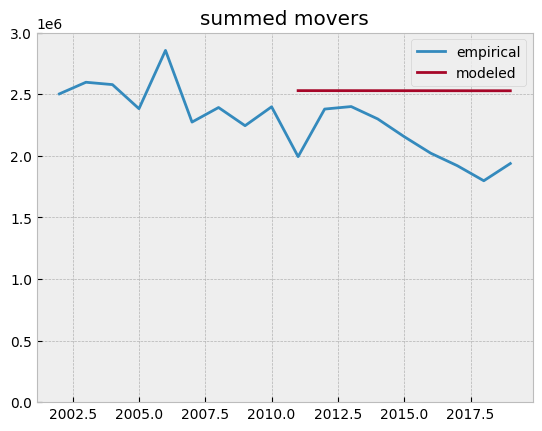

In [36]:
df_summed_movers.plot(title='summed movers', ylim=(0,3e6))

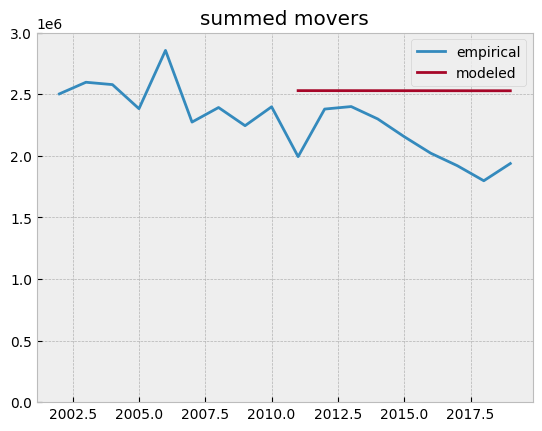

In [38]:
ax = df_summed_movers.plot(title='summed movers', ylim=(0,3e6))

In [39]:
large_movers_df

weights_2002  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  not renovated 1     rural             with_children    1       <40  q1              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q2              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q3              rural                    0.0   
...                                                                                                                                       ...   
SFH           private tenant renovated     4+    urban             without_children 5+      >=40 q3              urban                    0.0   
                                                                                                 q4              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q5              rural                    0.0   
                                                                                                                 urban                    0.0   

                                                                                                                                 weights_2003  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  not renovated 1     rural             with_children    1       <40  q1              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q2              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q3              rural                    0.0   
...                                                                                                                                       ...   
SFH           private tenant renovated     4+    urban             without_children 5+      >=40 q3              urban                    0.0   
                                                                                                 q4              rural                    0.0   
                                                                                                                 urban                    0.0   
                                                                                                 q5              rural                    0.0   
                                                                                                                 urban                    0.0   

                                                                                                                                 weights_2004  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  not renovated 1     rural             

In [40]:
filtered_df = large_movers_df[large_movers_df['what']=='regression']

In [44]:
filtered_df.iloc[0:5]

weights_2002  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  renovated     3     urban             without_children 1       >=40 q1              urban                 1481.0   
                                                                                    2       <40  q5              urban                10445.0   
                                           4+    urban             without_children 2       >=40 q5              urban                 1465.0   
              private tenant not renovated 1     rural             without_children 1       <40  q1              rural                 8842.0   
                                                                                            >=40 q1              rural                    0.0   

                                                                                                                                 weights_2003  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  renovated     3     urban             without_children 1       >=40 q1              urban                11522.0   
                                                                                    2       <40  q5              urban                    0.0   
                                           4+    urban             without_children 2       >=40 q5              urban                  805.0   
              private tenant not renovated 1     rural             without_children 1       <40  q1              rural                 2611.0   
                                                                                            >=40 q1              rural                 7897.0   

                                                                                                                                 weights_2004  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  renovated     3     urban             without_children 1       >=40 q1              urban                    0.0   
                                                                                    2       <40  q5              urban                  502.0   
                                           4+    urban             without_children 2       >=40 q5              urban                    0.0   
              private tenant not renovated 1     rural             without_children 1       <40  q1              rural                10286.0   
                                                                                            >=40 q1              rural                  886.0   

                                                                                                                                 weights_2005  \
building_type ownership      condition     rooms region_type_dwell hh_type          hh_size age  income_quintile region_type_hh                 
MFH           private owner  renovated     3     urban             without_children 1       >=40 q1              urban                    0.0   
                                                                                    2       <40  q5              urban                    0.0   
                                           4+    urban             without_children 2       >=40 q5              urban                    0.0   
              private tenant not renovated 1     rural             without_children 1       <40  q1              rural                15731.0   
                                                                                            >=40 q1              rural                 5531.0   

                                                                 

In [48]:
len(filtered_df.iloc[0:5])

5

In [53]:

for row_no in range(len(filtered_df.iloc[0:5])):
    row = pd.Series(filtered_df.iloc[row_no])

In [60]:
row.name

('MFH',
 'private tenant',
 'not renovated',
 '1',
 'rural',
 'without_children',
 '1',
 '>=40',
 'q1',
 'rural')

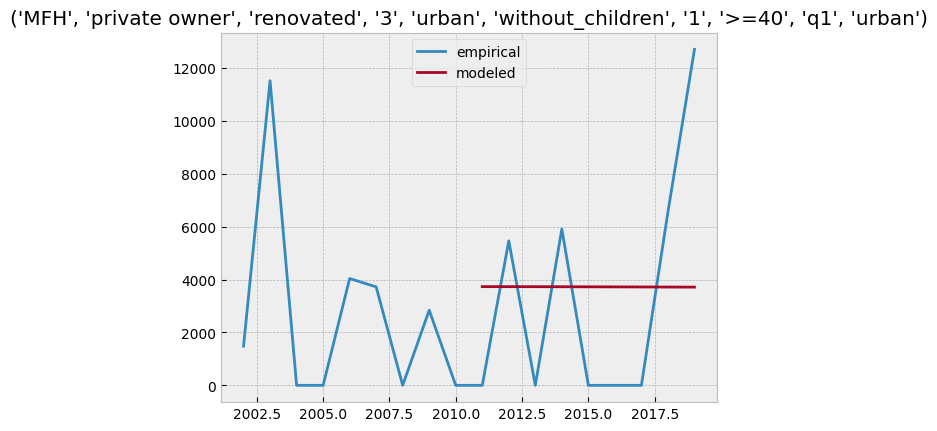

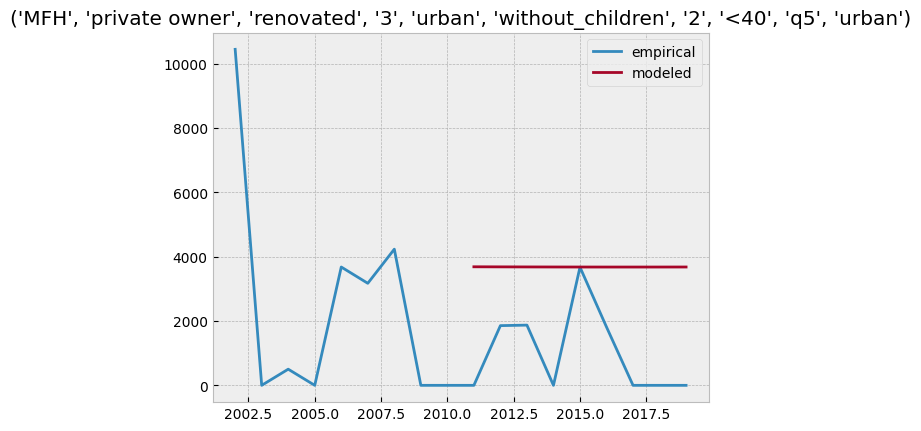

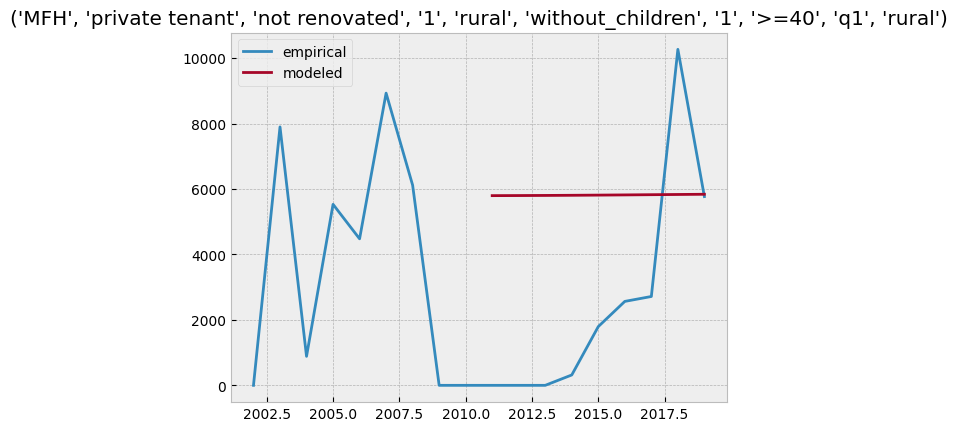

In [62]:
for row_no in range(len(filtered_df.iloc[0:5])):
    row = pd.Series(filtered_df.iloc[row_no])
    
    df_row_movers = pd.DataFrame(index=years)
    # for loop empirical
    for year in range(years_empirical[0], years_empirical[1]+1):
        df_row_movers.loc[year, 'empirical'] = row[f'weights_{year}']
    
    # for loop modeled
    for year in range(years_model[0], years_model[1]+1):
        df_row_movers.loc[year, 'modeled'] = row[f'weights_{year}_reg']
        df_row_movers.loc[year, 'empirical'] = row[f'weights_{year}']
    df_row_movers.plot(title = str(row.name))

In [58]:
df_row_movers.plot()

<Axes: >

In [65]:
os.getcwd()

'/home/pool/mod/inhabit/notebooks'